### Step 1: Prepare the data

In [2]:
import pandas as pd
import numpy as np

In [5]:
# Get all reviews from the Tiki dataset
df = pd.read_excel('../02.Dataset/Tiki.xlsx', sheet_name='Reviews')
df.to_csv('../02.Dataset/reviews.csv', index=False, encoding="utf-8")
    

In [6]:
df = pd.read_csv('../02.Dataset/reviews.csv')

In [74]:
len(df)

102384

In [75]:
df.isnull().sum()

ProductID           0
CustomerID         16
CustomerName      103
Rating              0
Comment         64584
dtype: int64

In [76]:
df.dropna(inplace=True)

In [77]:
len(df)

37765

In [59]:
blanks = []

for i,prod_id,cus_id,cus_name,rating,comment,label in df.itertuples():
  if comment.isspace():
    blanks.append(i)

In [60]:
blanks

[]

In [67]:
import emoji
import re

# Clean icons
def clean_icons(text):
    text = emoji.replace_emoji(text, replace="")
    text = re.sub(r"[:;][-~]?[)D(/\\|pP]", "", text)
    text = text.replace("_x000D_", " ")
    return text

In [78]:
df['Comment'] = df['Comment'].apply(clean_icons)

In [79]:
df.to_csv("../02.Dataset/reviews.csv")

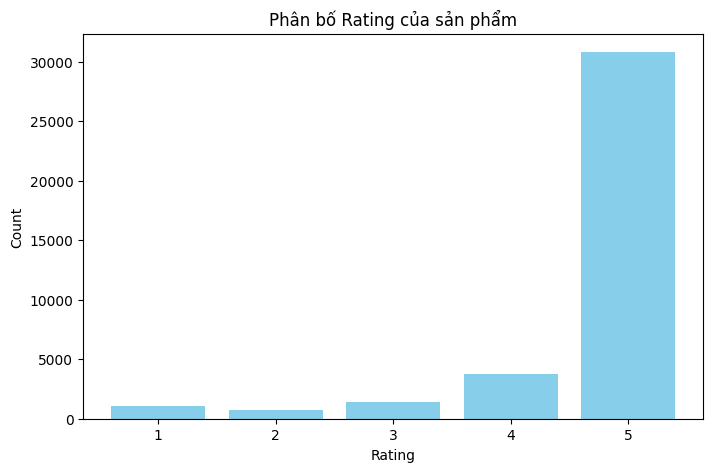

In [80]:
import matplotlib.pyplot as plt

rating_counts = df["Rating"].value_counts().sort_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
plt.bar(rating_counts.index, rating_counts.values, color="skyblue")
plt.title("Phân bố Rating của sản phẩm")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rating_counts.index)
plt.show()

### Step 2: Split the data into a training set and a test set

In [31]:
from sklearn.model_selection import train_test_split 

In [34]:
X = df['Comment']

y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Step 3: Train and fit the model

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [36]:
text_clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [38]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

### Step 4: Run predictions and analyze the results

In [40]:
predictions = text_clf.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [43]:
print(confusion_matrix(y_test, predictions))

[[  3  11]
 [  3 120]]


In [44]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         neg       0.50      0.21      0.30        14
         pos       0.92      0.98      0.94       123

    accuracy                           0.90       137
   macro avg       0.71      0.59      0.62       137
weighted avg       0.87      0.90      0.88       137



In [45]:
print(accuracy_score(y_test, predictions))

0.8978102189781022


In [46]:
text_clf.predict(["Sách hay quá"])

array(['pos'], dtype=object)

In [50]:
text_clf.predict(
    [
        "Lần này tiki vận chuyển cũng được, chỉ là mấy cuốn kia đều có màng bọc, mỗi cuốn này không có. Sách thì khá cuốn đó."
    ]
)

array(['pos'], dtype=object)